# Exploratory Data Analysis

## Load data

In [1]:
import pandas as pd

def load_csv_data(filename):
    """
    Load data from a CSV file and return a pandas DataFrame.

    Args:
        filename (str): Path to the CSV file.

    Returns:
        pd.DataFrame: Loaded data.
    """
    try:
        # timestamp as datetime, date as date, label as category
        df = pd.read_csv(filename, parse_dates=['timestamp', 'date'])
        return df
    except FileNotFoundError:
        print(f"File '{filename}' not found. Please check the path.")
        return None


In [2]:
# load csv data
csv_filename = "hour24.csv"
data_df = load_csv_data(csv_filename)
if data_df is not None:
    print(f"Loaded {len(data_df)} rows from {csv_filename}.")


Loaded 765 rows from hour24.csv.


In [3]:
# print info
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         765 non-null    object        
 1   timestamp  765 non-null    datetime64[ns]
 2   mean       765 non-null    float64       
 3   sum        765 non-null    int64         
 4   median     765 non-null    float64       
 5   std        765 non-null    float64       
 6   var        765 non-null    float64       
 7   min        765 non-null    float64       
 8   max        765 non-null    float64       
 9   date       765 non-null    datetime64[ns]
 10  label      765 non-null    int64         
dtypes: datetime64[ns](2), float64(6), int64(2), object(1)
memory usage: 65.9+ KB
None


In [4]:
# print head
print(data_df.head())

            id  timestamp        mean     sum  median         std  \
0  condition_1 2003-05-08  156.247222  224996    27.0  229.109777   
1  condition_1 2003-05-09  124.135417  178755    14.0  211.241278   
2  condition_1 2003-05-10  134.961806  194345    33.0  230.954732   
3  condition_1 2003-05-11   99.439583  143193    15.0  177.719972   
4  condition_1 2003-05-12  316.874306  456299    40.5  496.184847   

             var  min     max       date  label  
0   52491.289777  0.0  1954.0 2003-05-08      1  
1   44622.877411  0.0  1672.0 2003-05-09      1  
2   53340.088186  0.0  2146.0 2003-05-10      1  
3   31584.388286  0.0  2080.0 2003-05-11      1  
4  246199.402536  0.0  3526.0 2003-05-12      1  


## Descriptive Statistics

### Overall Statistics

In [5]:
# print date range
print(f"Date range: {data_df['timestamp'].min()} to {data_df['timestamp'].max()}\n")
# print number of unique days
print(f"Number of unique days: {data_df['timestamp'].dt.date.nunique()}\n")
# print number of unique hours
print(f"Number of unique hours: {data_df['timestamp'].dt.hour.nunique()}\n")
# print number of unique ids
print(f"Number of unique ids: {data_df['id'].nunique()}\n")
# print averge number of days per id for each label
print("Average number of days per id for each label: ")
print(data_df.groupby("label")['timestamp'].nunique() / data_df.groupby("label")['id'].nunique())


Date range: 2002-05-25 00:00:00 to 2006-02-13 00:00:00

Number of unique days: 445

Number of unique hours: 1

Number of unique ids: 55

Average number of days per id for each label: 
label
0     6.843750
1    10.956522
dtype: float64


In [6]:
# describe data
#print(data_df.describe())

# describe data by label
print(data_df.groupby("label", observed=False)[['mean', 'median']].describe())


        mean                                                            \
       count        mean        std        min         25%         50%   
label                                                                    
0      444.0  279.945206  99.002385  83.256250  207.237326  278.193403   
1      321.0  183.388603  98.545601  49.852778   95.956944  174.361806   

                              median                                     \
              75%         max  count        mean        std  min    25%   
label                                                                     
0      343.895486  626.290278  444.0  111.513514  87.813995  0.0  42.75   
1      246.621528  584.284722  321.0   45.781931  60.188668  0.0   2.00   

                            
         50%    75%    max  
label                       
0      103.0  154.0  600.0  
1       26.5   62.0  478.0  


In [7]:
# mean of mean
print(f"Mean of mean: {data_df['mean'].mean()}")
# median of mean
print(f"Median of mean: {data_df['mean'].median()}")
# variance of mean
print(f"Variance of mean: {data_df['mean'].var()}")
# standard deviation of mean
print(f"Standard deviation of mean: {data_df['mean'].std()}")
# skewness of mean
print(f"Skewness of mean: {data_df['mean'].skew()}")
# kurtosis of mean
print(f"Kurtosis of mean: {data_df['mean'].kurtosis()}")


Mean of mean: 239.4292982933914
Median of mean: 236.5861111111111
Variance of mean: 12024.359119087423
Standard deviation of mean: 109.65563879293862
Skewness of mean: 0.4315102602252226
Kurtosis of mean: -0.02960429503115014


* skewness indicates a right-skewed distribution - longer tail on the right
* kurtosis measures peakedness or flatness of distribution - negative means slightly flatter than normal distribution

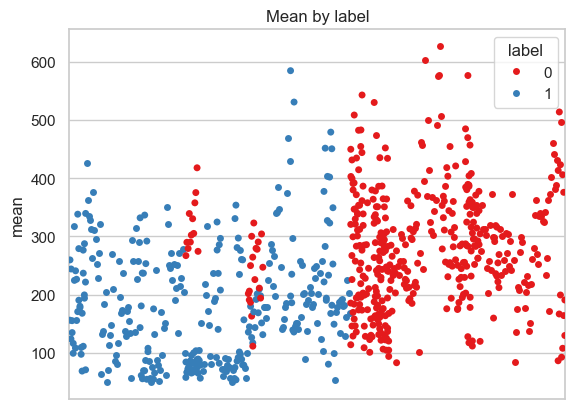

In [8]:
# dotplot of min, mean, max for every id, grouped by label
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# create a figure and axis
fig, ax = plt.subplots()
# plot the data with different colored dots for each label
sns.stripplot(x="timestamp", y="mean", hue="label", data=data_df, palette="Set1", jitter=True, ax=ax)
# remove xticks
ax.set_xticks([])
# remove xlabel
ax.set_xlabel('')
ax.set_xticklabels([])
# add title
ax.set_title('Mean by label')
# show plot
plt.show()


### linking R

In [9]:
# install rpy2
#!pip install rpy2

#import os
#print(os.getenv("R_HOME"))

#echo %R_HOME%

%load_ext rpy2.ipython

#%%R -i data_df
#install.packages("ggplot2", repos='http://cran.us.r-project.org', quiet=TRUE)
#library(ggplot2)

c:\Users\zoona\Anaconda3\envs\igp5_env\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [10]:
%%R -i data_df

# moments library
#install.packages("moments", repos='http://cran.us.r-project.org', quiet=TRUE)
library(moments)

#  skewness
skewnewss <- skewness(data_df$mean)
print(skewnewss)

# Calculate kurtosis
kurtosis <- kurtosis(data_df$mean)
print(kurtosis)


[1] 0.4306637
[1] 2.962756


### Between Groups

#### T-test between groups

In [11]:
# evaluate if there is a difference between labels with t-test
alpha = 0.05
from scipy.stats import ttest_ind
label_0 = data_df[data_df["label"] == 0]["mean"]
label_1 = data_df[data_df["label"] == 1]["mean"]
ttest_result = ttest_ind(label_0, label_1)

# print t-test result
print(f"t-test p-value: {ttest_result.pvalue}")
if ttest_result.pvalue < alpha:
    print("There is a significant difference between the two labels.")


t-test p-value: 1.2469525412850745e-36
There is a significant difference between the two labels.


### Plotting key statistics between labels

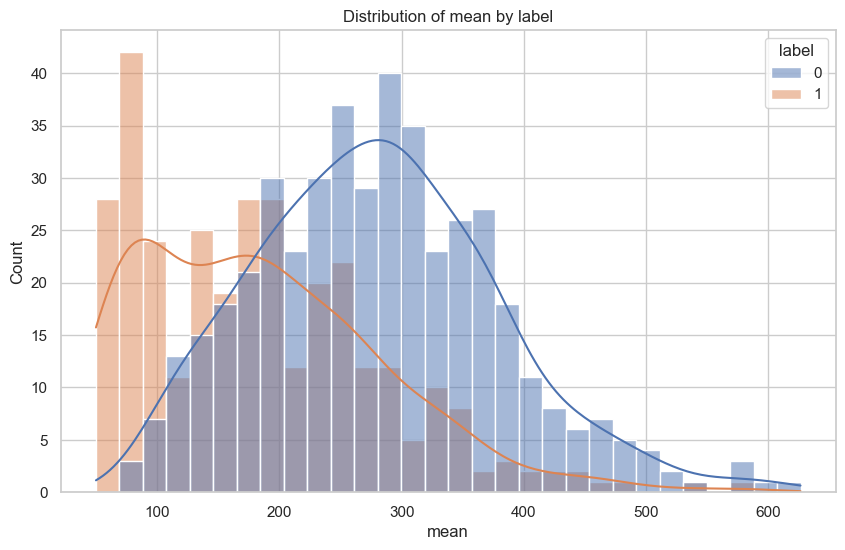

In [12]:
# plot distribution of mean by label
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=data_df, x="mean", hue="label", kde=True, bins=30)
plt.title("Distribution of mean by label")
plt.show()





In [13]:
# calculate mean of 'statistic' by label
def calculate_statistic_by_label(data_df, statistic):
    """
    Calculate the mean of a statistic by label.

    Args:
        data_df (pd.DataFrame): Data.
        statistic (str): Statistic to calculate.

    Returns:
        pd.Series: Mean of the statistic by label.
    """
    return data_df.groupby("label")[statistic].mean()


Mean of mean by label:
label
0    279.945206
1    183.388603
Name: mean, dtype: float64


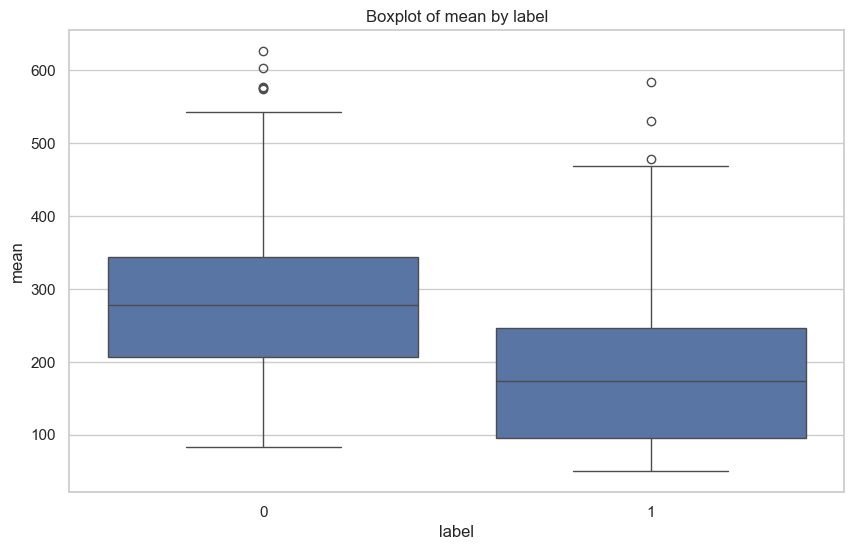



Mean of median by label:
label
0    111.513514
1     45.781931
Name: median, dtype: float64


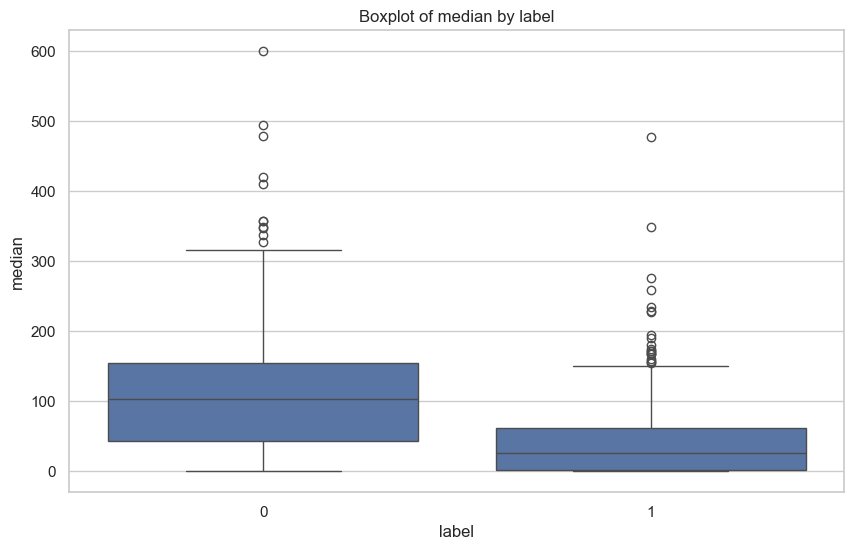



Mean of max by label:
label
0    2955.898649
1    2421.414330
Name: max, dtype: float64


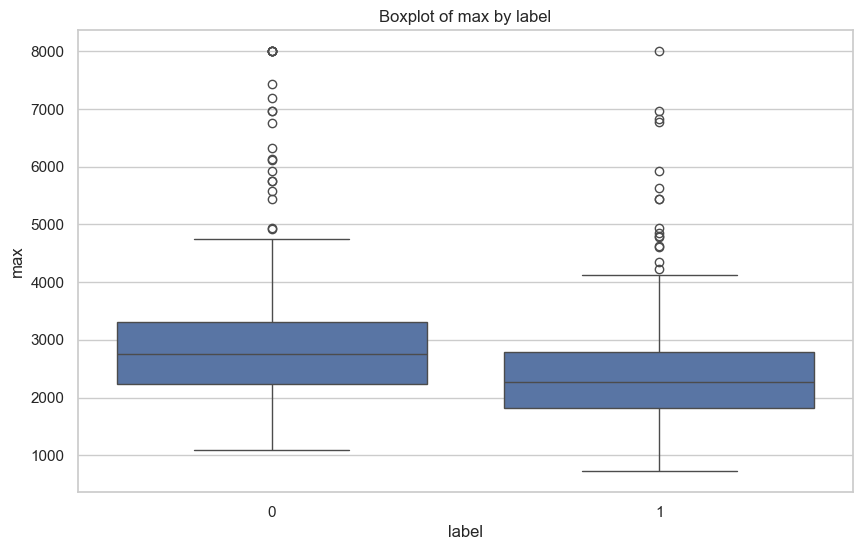



Mean of std by label:
label
0    403.369643
1    299.901501
Name: std, dtype: float64


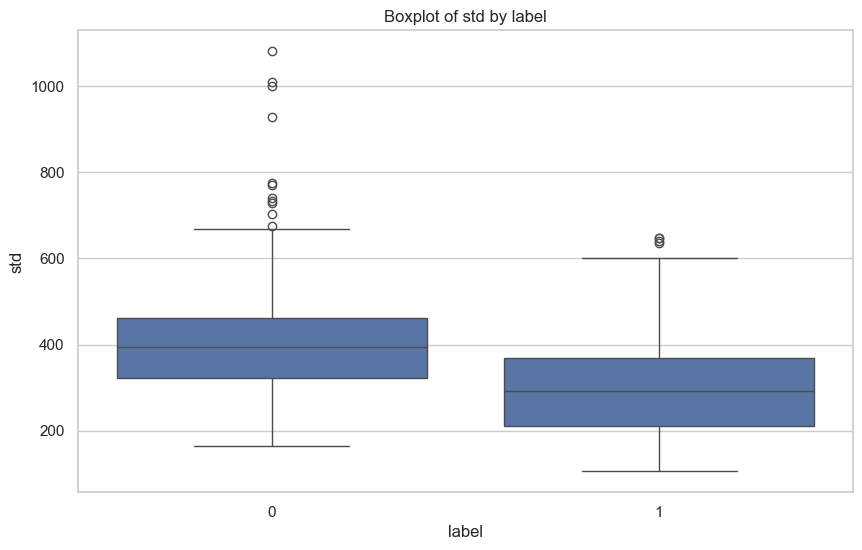



Mean of var by label:
label
0    177034.662240
1    102978.256987
Name: var, dtype: float64


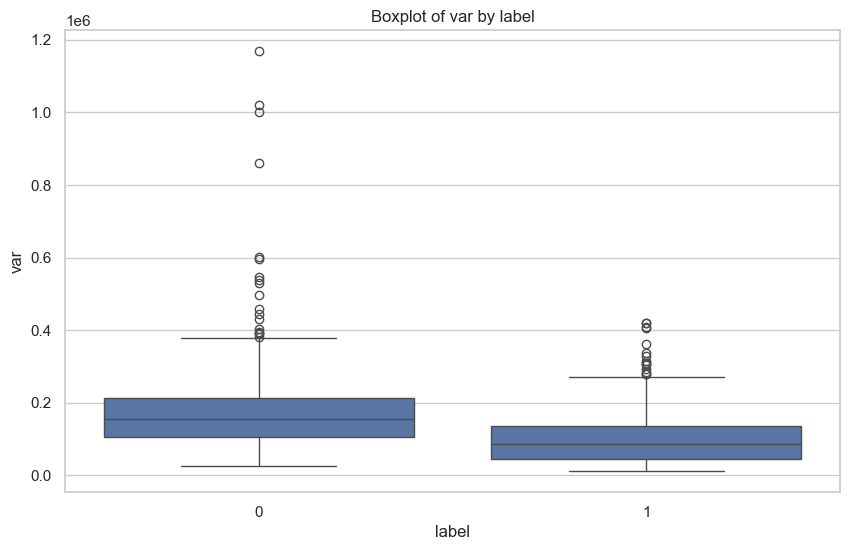

In [14]:
# calculate mean, median, max, std, var by label and plot boxplot
for statistic in ["mean", "median", "max", "std", "var"]:
    print(f"Mean of {statistic} by label:")
    print(calculate_statistic_by_label(data_df, statistic))
    # boxplot of statistic by label
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data_df, x="label", y=statistic)
    plt.title(f"Boxplot of {statistic} by label")
    plt.show()
    print("\n")


label             0            1
mean     279.945206   183.388603
median   111.513514    45.781931
min        0.092342     0.327103
max     2955.898649  2421.414330


<Figure size 1000x600 with 0 Axes>

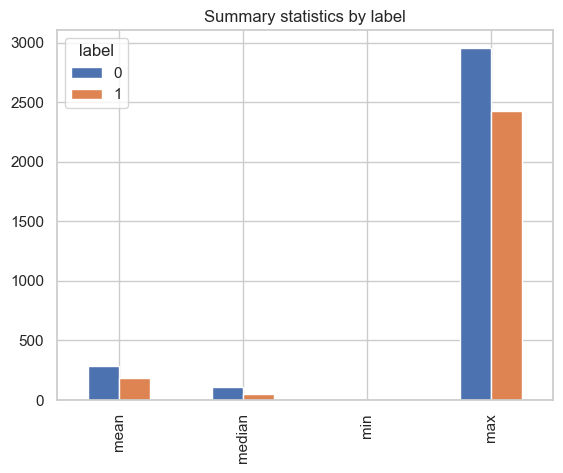

In [15]:
# grouped bar chart for summary statistics by label
data_df2 = data_df.groupby("label")[["mean", "median", "min", "max"]].mean()
data_df2 = data_df2.T
print(data_df2)


# plot grouped bar chart
plt.figure(figsize=(10, 6))
data_df2.plot(kind="bar")
plt.title("Summary statistics by label")
plt.show()

### Density plot of Mean by Label

In addition: Warning message:
package 'ggplot2' was built under R version 4.3.2 


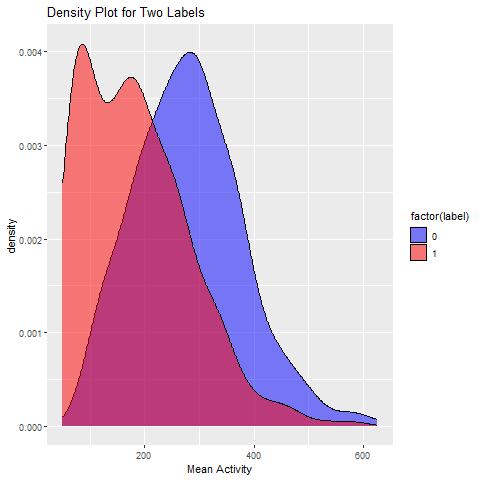

In [16]:
%%R 

# Load necessary libraries
library(ggplot2)

# Create a density plot
ggplot(data_df, aes(x=mean, fill=factor(label))) +
  geom_density(alpha=0.5) +
  labs(title="Density Plot for Two Labels", x="Mean Activity") +
  scale_fill_manual(values=c("blue", "red"))  # Customize colors


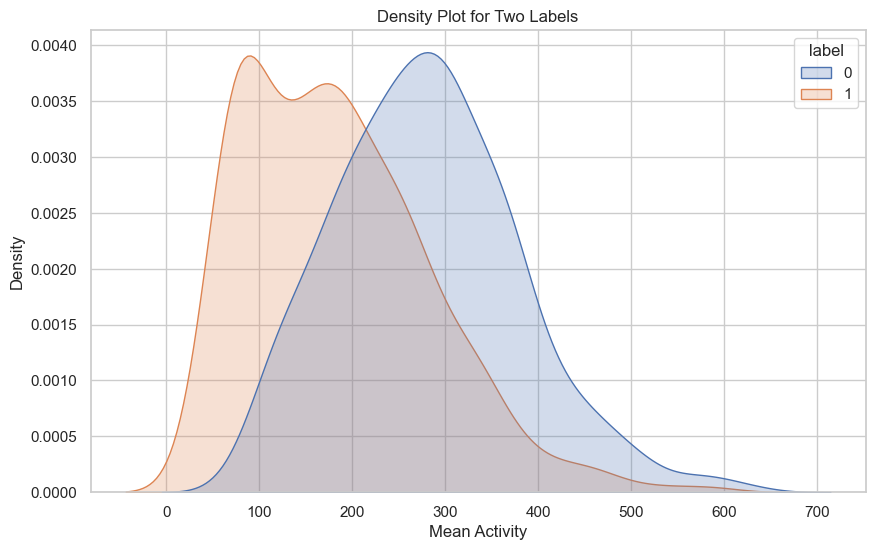

In [17]:
# density plot for mean by label
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data_df, x="mean", hue="label", fill=True, common_norm=False)
plt.title("Density Plot for Two Labels")
plt.xlabel("Mean Activity")
plt.show()


### Visualising Descriptive Statistics over time

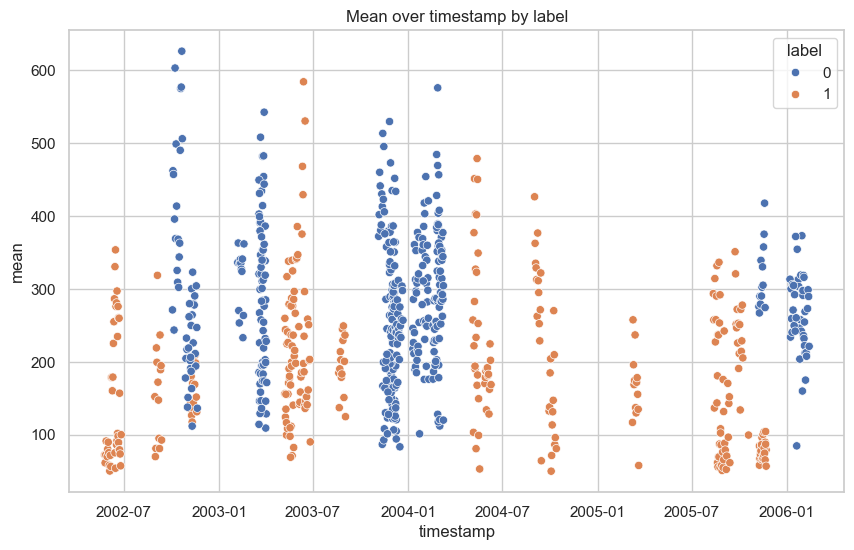

In [18]:
# plot mean over timestamp by label
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_df, x="timestamp", y="mean", hue="label")
plt.title("Mean over timestamp by label")
plt.show()


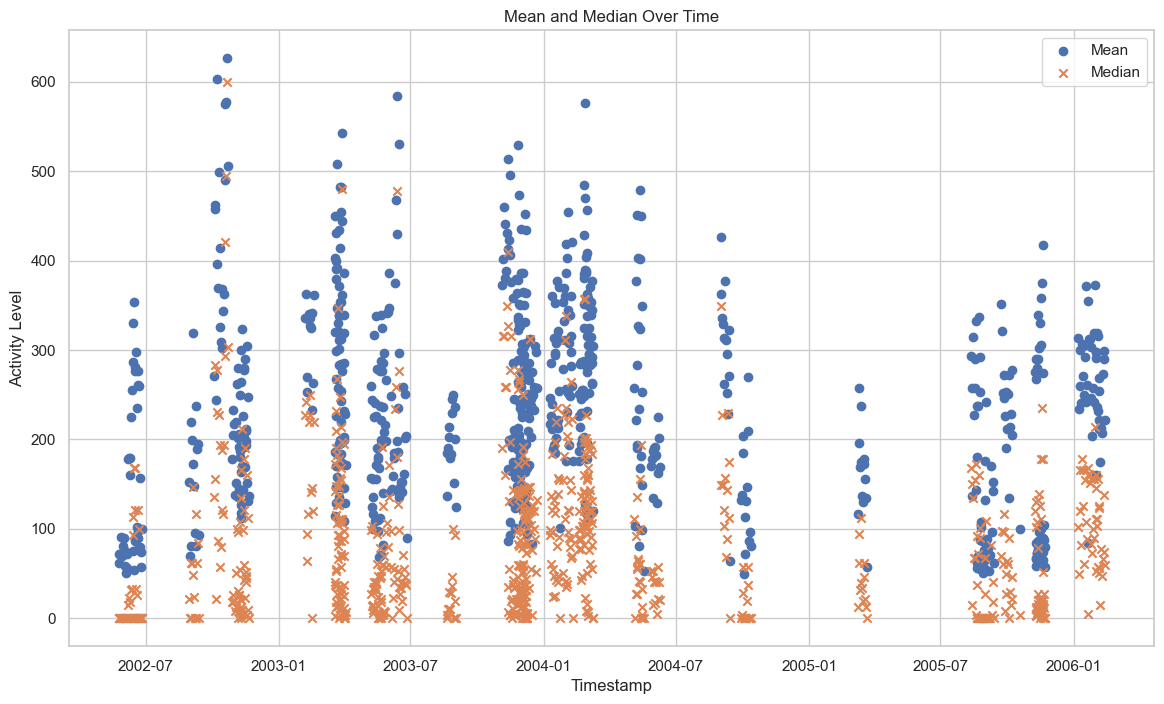

In [19]:
import matplotlib.pyplot as plt

# plot mean and median as scatter plot
plt.figure(figsize=(14, 8))
plt.scatter(data_df['timestamp'], data_df['mean'], label='Mean', marker='o')
plt.scatter(data_df['timestamp'], data_df['median'], label='Median', marker='x')
plt.xlabel('Timestamp')
plt.ylabel('Activity Level')
plt.title('Mean and Median Over Time')
plt.legend()
plt.grid(True)
plt.show()




## Moving Averages and Trends

### Simple moving average (SMA)

* smooth out fluctuations
* average of a specified window by sliding to get overall trend or pattern

why?
* **noise reduction**
* **identify trends**
* **forecasting**



#### Overall SMA

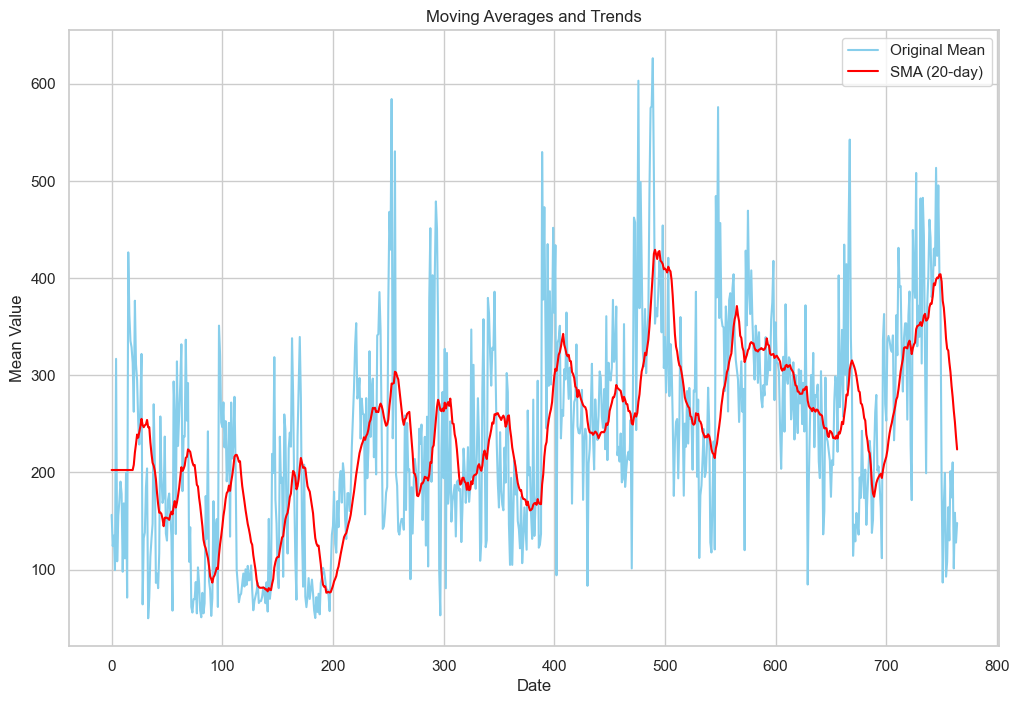

In [20]:


# simple moving average (SMA) for the 'mean' column
window_size = 20
data_df['SMA'] = data_df['mean'].rolling(window=window_size).mean()

# fill NaN values in the SMA column
data_df['SMA'] = data_df['SMA'].bfill()

# figure size
plt.figure(figsize=(12, 8))

# original 'mean' and the SMA
plt.plot(data_df['mean'], label='Original Mean', color='skyblue')
plt.plot(data_df['SMA'], label=f'SMA ({window_size}-day)', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Moving Averages and Trends')
plt.legend()
plt.show()


#### SMA by label

In [21]:
# create SMA for 'mean' by label
data_df['SMA_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=window_size).mean())

# fill NaN with the original 'mean' value
#data_df['SMA_mean_label'] = data_df['SMA_mean_label'].fillna(data_df['mean'])

# fill NaN with 0
#data_df['SMA_mean_label'] = data_df['SMA_mean_label'].fillna(0)

# backfill NaN
data_df['SMA_label'] = data_df['SMA_label'].bfill()


In [22]:
def plot_rolling_average(data_df, window_size, stat, rolling_average_name):
    """
    Plots the original 'stat' and the specified rolling average (e.g., SMA or rolling std) by label in side-by-side plots using the same y-axis.

    Parameters:
    - data_df (DataFrame): The DataFrame containing the data.
    - window_size (int): The window size for calculating the rolling average.
    - stat (str): The column name of the original statistic.
    - rolling_average_name (str): The name of the rolling average (e.g., "SMA" or "Rolling_std").

    Returns:
    - None
    """

    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
    for label, ax in zip(data_df['label'].unique(), axes):
        data_df_label = data_df[data_df['label'] == label]
        ax.plot(data_df_label[stat], label=f'Original {stat}', color='skyblue')
        ax.plot(data_df_label[f'{rolling_average_name}_label'], label=f'{rolling_average_name} ({window_size}-day)', color='red')
        ax.set_title(f"Label {label}")
        ax.set_xlabel('Date')
        ax.set_ylabel(f'{stat} Value')
        ax.set_xticklabels([])  # hide x-axis labels
        ax.legend()



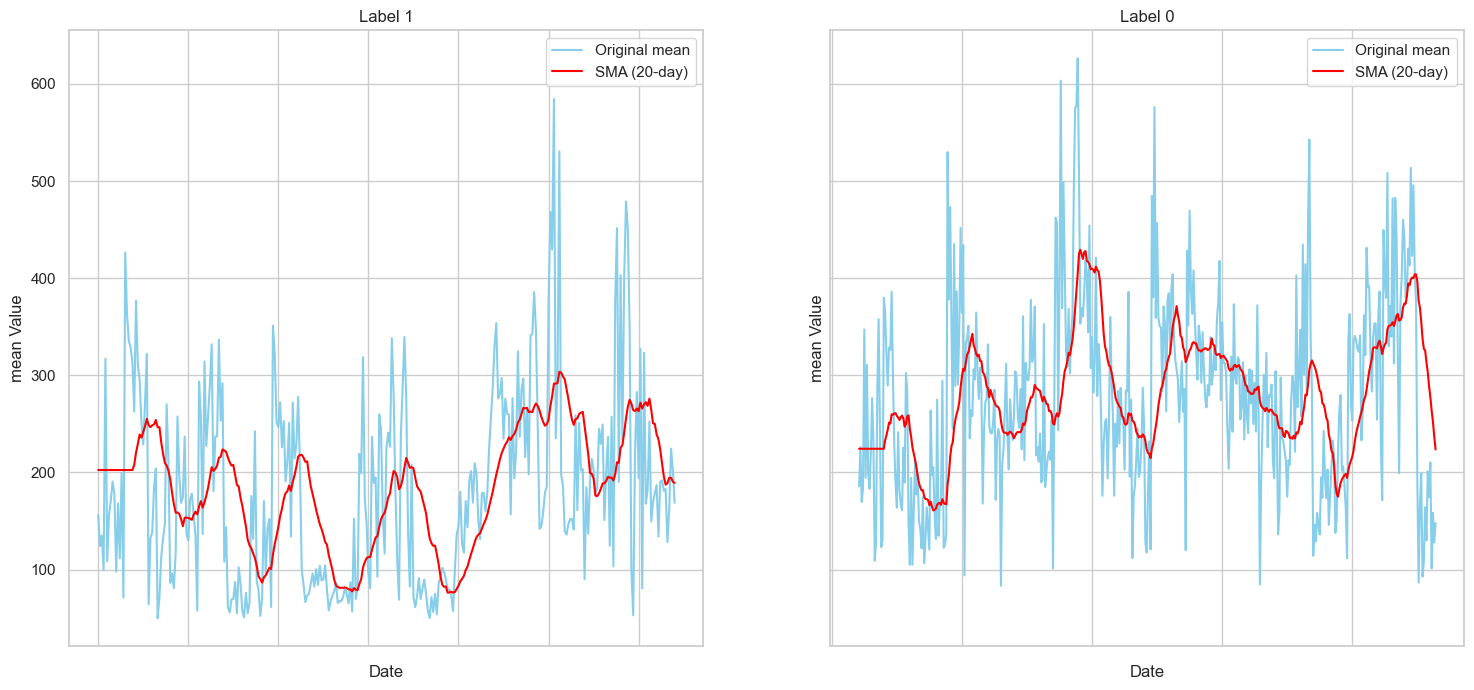

In [23]:
# plot mean and SMA by label
plot_rolling_average(data_df, window_size, 'mean', 'SMA')

In [24]:
# print missing data
#print(f"Missing data: {data_df.isnull().sum()}")

### Rolling standard deviation

#### Overall

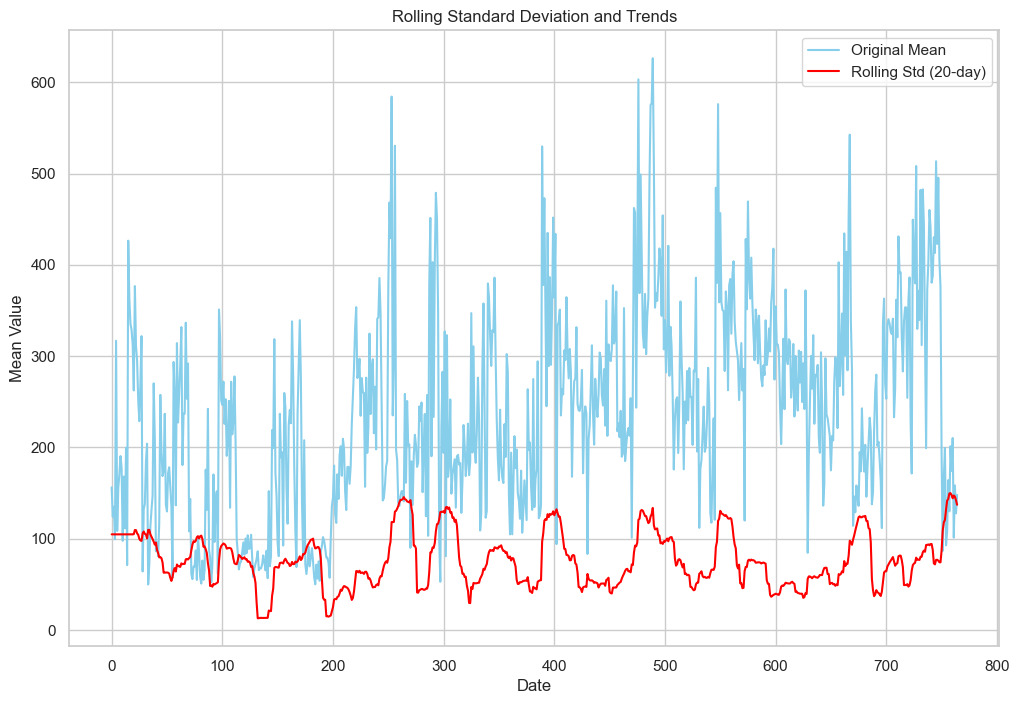

In [25]:
# rolling standard deviation for the 'mean' column
data_df['Rolling_std'] = data_df['mean'].rolling(window=window_size).std()

# backfill NaN
data_df['Rolling_std'] = data_df['Rolling_std'].bfill()

# plot mean and rolling std
plt.figure(figsize=(12, 8))
plt.plot(data_df['mean'], label='Original Mean', color='skyblue')
plt.plot(data_df['Rolling_std'], label=f'Rolling Std ({window_size}-day)', color='red')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.title('Rolling Standard Deviation and Trends')
plt.legend()
plt.show()


In [26]:
# info 
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           765 non-null    object        
 1   timestamp    765 non-null    datetime64[ns]
 2   mean         765 non-null    float64       
 3   sum          765 non-null    int64         
 4   median       765 non-null    float64       
 5   std          765 non-null    float64       
 6   var          765 non-null    float64       
 7   min          765 non-null    float64       
 8   max          765 non-null    float64       
 9   date         765 non-null    datetime64[ns]
 10  label        765 non-null    int64         
 11  SMA          765 non-null    float64       
 12  SMA_label    765 non-null    float64       
 13  Rolling_std  765 non-null    float64       
dtypes: datetime64[ns](2), float64(9), int64(2), object(1)
memory usage: 83.8+ KB
None


#### Rolling std by label

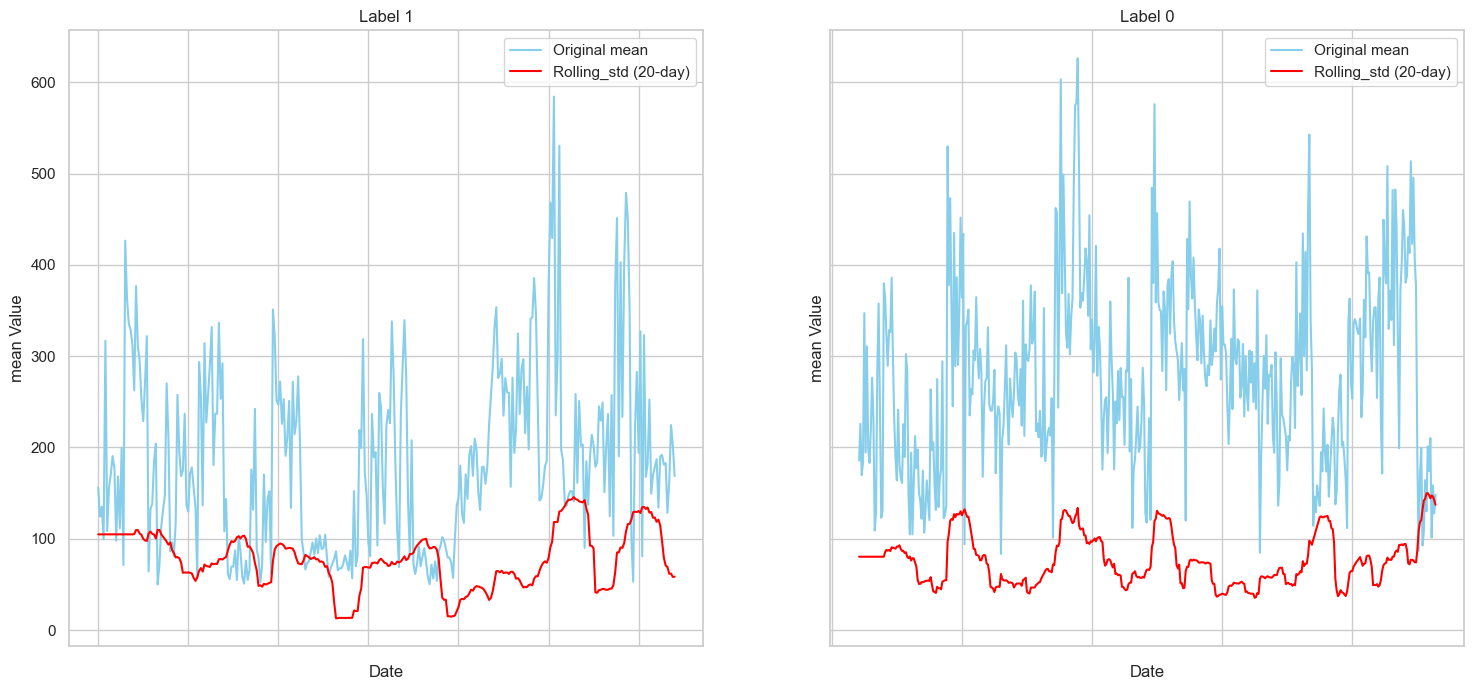

In [27]:
# create rolling standard deviation for 'mean' by label
data_df['Rolling_std_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=window_size).std())
# nan with backfill
data_df['Rolling_std_label'] = data_df['Rolling_std_label'].bfill()

# plot rolling standard deviation
plot_rolling_average(data_df, window_size, 'mean', 'Rolling_std')


### Rolling Correlation

#### Overall 

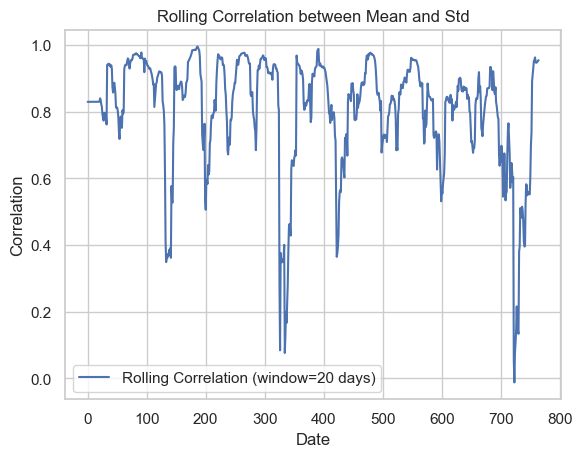

In [28]:
# rolling correlation between 'mean' and 'std'
data_df['rolling_corr'] = data_df['mean'].rolling(window=20).corr(data_df['std'])

# fill NaN backfill
data_df['rolling_corr'] = data_df['rolling_corr'].bfill()

# Plot the rolling correlation
plt.plot(data_df['rolling_corr'], label='Rolling Correlation (window=20 days)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.title('Rolling Correlation between Mean and Std')
plt.legend()
plt.show()


In [29]:
# info
#print(data_df.info())

#### By label

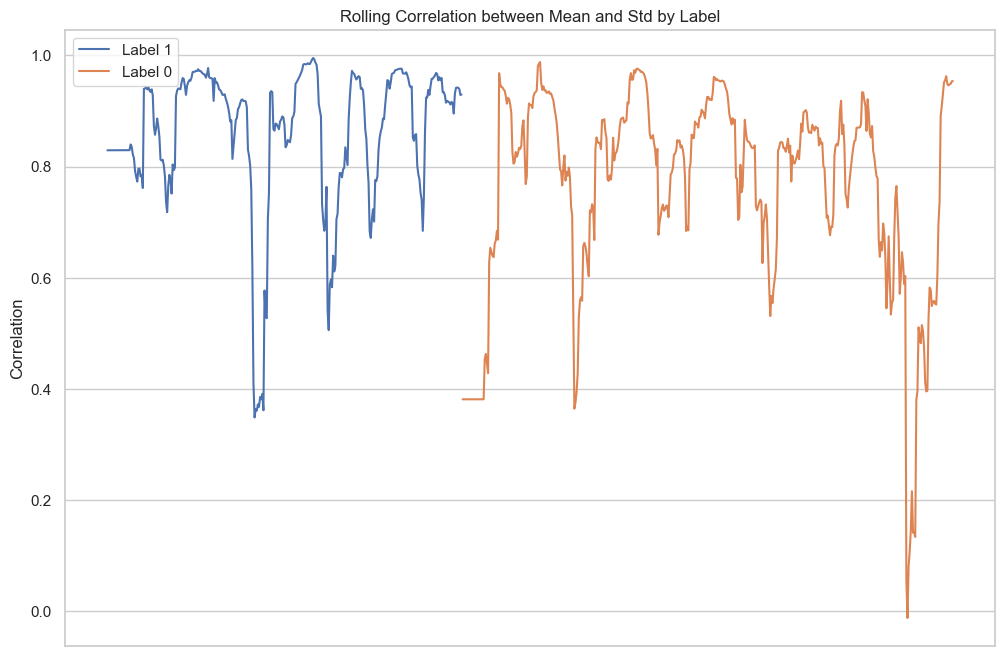

In [30]:
# create rolling correlation by label
data_df['rolling_corr_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=20).corr(data_df['std']))
# backfill NaN
data_df['rolling_corr_label'] = data_df['rolling_corr_label'].bfill()

# plot rolling correlation by labels on the same plot
fig, ax = plt.subplots(figsize=(12, 8))
for label in data_df['label'].unique():
    data_df_label = data_df[data_df['label'] == label]
    ax.plot(data_df_label['rolling_corr_label'], label=f'Label {label}')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('Correlation')
ax.set_title('Rolling Correlation between Mean and Std by Label')
ax.legend()
plt.show()


### Rolling covariance

#### Overall

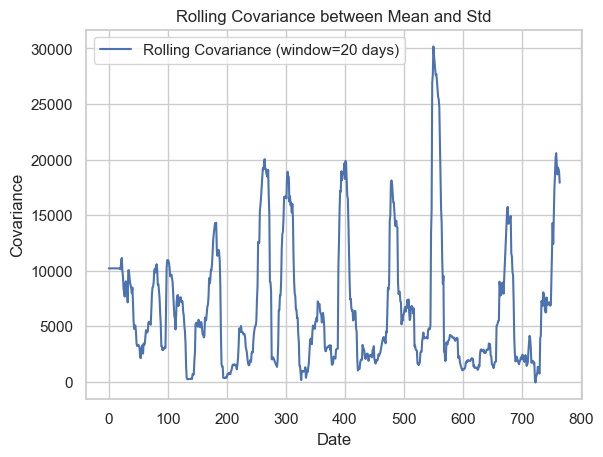

In [31]:
# rolling covariance between 'mean' and 'std'
data_df['rolling_cov'] = data_df['mean'].rolling(window=20).cov(data_df['std'])

# backfill NaN
data_df['rolling_cov'] = data_df['rolling_cov'].bfill()

# Plot the rolling covariance
plt.plot(data_df['rolling_cov'], label='Rolling Covariance (window=20 days)')
plt.xlabel('Date')
plt.ylabel('Covariance')
plt.title('Rolling Covariance between Mean and Std')
plt.legend()
plt.show()


#### By label

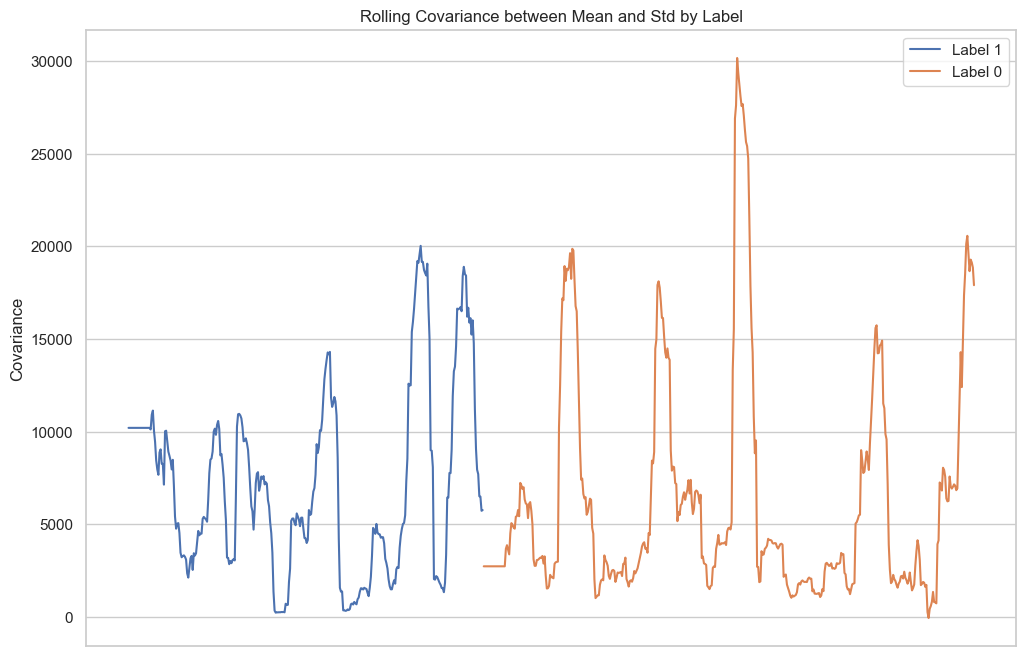

In [32]:
# create rolling covariance by label
data_df['rolling_cov_label'] = data_df.groupby('label')['mean'].transform(lambda x: x.rolling(window=20).cov(data_df['std']))
# backfill NaN
data_df['rolling_cov_label'] = data_df['rolling_cov_label'].bfill()

# plot rolling covariance by labels on the same plot
fig, ax = plt.subplots(figsize=(12, 8))
for label in data_df['label'].unique():
    data_df_label = data_df[data_df['label'] == label]
    ax.plot(data_df_label['rolling_cov_label'], label=f'Label {label}')
ax.set_xlabel('')
ax.set_xticks([])
ax.set_ylabel('Covariance')
ax.set_title('Rolling Covariance between Mean and Std by Label')
ax.legend()
plt.show()


## Time Series Decomposition

* break down into components - level, trend, seasonality, noise

**additive**

$y(t) = \text{{Level}} + \text{{Trend}} + \text{{Seasonality}} + \text{{Noise}}$

**multiplicative**

$ y(t) = \text{{Level}} \times \text{{Trend}} \times \text{{Seasonality}} \times \text{{Noise}}$

### seasonal decompose

In [33]:
#!pip install statsmodels
# print info
#print(data_df.info())
# print the index
#print(data_df.index)
pd.date_range(data_df['timestamp'].min(), data_df['timestamp'].max(), freq='D').difference(data_df['timestamp'])


DatetimeIndex(['2002-05-29', '2002-06-27', '2002-06-28', '2002-06-29',
               '2002-06-30', '2002-07-01', '2002-07-02', '2002-07-03',
               '2002-07-04', '2002-07-05',
               ...
               '2005-12-29', '2005-12-30', '2005-12-31', '2006-01-01',
               '2006-01-02', '2006-01-03', '2006-01-04', '2006-01-05',
               '2006-01-06', '2006-02-09'],
              dtype='datetime64[ns]', length=916, freq=None)

In [55]:
# make copy of df_data
df = data_df.copy()

# print date range of the data, num of days
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Number of days: {df['timestamp'].nunique()}")

# print date range of the data, num of days by labels
print("\nDate range by label:")
print(df.groupby("label")['timestamp'].agg(['min', 'max', 'nunique']))



Date range: 2002-05-25 00:00:00 to 2006-02-13 00:00:00
Number of days: 445

Date range by label:
             min        max  nunique
label                               
0     2002-10-03 2006-02-13      219
1     2002-05-25 2005-11-22      252


The data range is huge for 55 respondents - the plots will be a mess. 

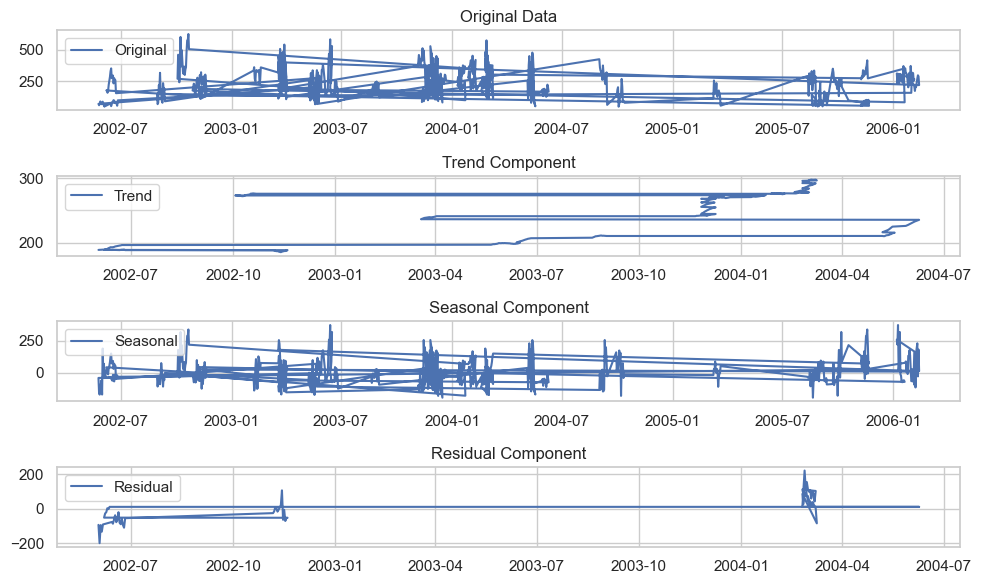

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose



#  additive decomposition
result = seasonal_decompose(df['mean'], model='additive', period=)  # Adjust 'period' as needed

#  components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

#  the components
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df['timestamp'], df['mean'], label='Original')
plt.legend(loc='upper left')
plt.title('Original Data')
plt.subplot(412)
plt.plot(df['timestamp'], trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')
plt.subplot(413)
plt.plot(df['timestamp'], seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(df['timestamp'], residual, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()


Somehow we need to get the seasonality by id and then aggregate into label for comparison, investigation.

1. time series for each id
2. seasonal decomposition for each id independently
3. aggregate by label
4. plot

In [59]:

# step1 - ts for each id
id_series = df.groupby('id')['mean'].apply(list)


In [61]:
# print lengths of each id series
print(id_series.apply(len))

id
condition_1     15
condition_10    14
condition_11    14
condition_12    13
condition_13    15
condition_14    14
condition_15    12
condition_16    17
condition_17    14
condition_18    14
condition_19    14
condition_2     19
condition_20    12
condition_21    12
condition_22    14
condition_23    17
condition_3     14
condition_4     13
condition_5     14
condition_6     14
condition_7     13
condition_8     10
condition_9     13
control_1       14
control_10      14
control_11      14
control_12      13
control_13      13
control_14      14
control_15      14
control_16      14
control_17      13
control_18      13
control_19      14
control_2       20
control_20      13
control_21      14
control_22      14
control_23      14
control_24      13
control_25      14
control_26      14
control_27      13
control_28      16
control_29      14
control_3       14
control_30      13
control_31      13
control_32      13
control_4       14
control_5       13
control_6       14
control_7

In [ ]:

# step2 - seasonal decomposition for each id
seasonal_components = {}
for id, series in id_series.items():
    result = seasonal_decompose(series, model='additive', period=5)  # adjust 'period' as needed
    seasonal_components[id] = result.seasonal


In [ ]:

# step3 -  aggregate seasonal components by label
label_aggregated_seasonality = {}
for label in df['label'].unique():
    label_data = df[df['label'] == label]
    label_ids = label_data['id'].unique()
    max_length = max(len(seasonal_components[id]) for id in label_ids)
    aggregated_seasonality = np.zeros(max_length)
    for id in label_ids:
        seasonal_component = seasonal_components[id]
        if len(seasonal_component) < max_length:
            seasonal_component = np.pad(seasonal_component, (0, max_length - len(seasonal_component)), 'constant', constant_values=np.nan)
        aggregated_seasonality += seasonal_component
    label_aggregated_seasonality[label] = aggregated_seasonality / len(label_ids)


In [ ]:

# plot the aggregated seasonal components
plt.figure(figsize=(10, 6))
for label, seasonality in label_aggregated_seasonality.items():
    plt.plot(df['timestamp'], seasonality, label=f'Label {label}')
plt.legend(loc='upper left')
plt.title('Aggregated Seasonal Components by Label')
plt.xlabel('Timestamp')
plt.ylabel('Seasonal Component')
plt.tight_layout()
plt.show()


Time Series Decomposition:
Decompose your time series data into its components: trend, seasonality, cyclicity, and irregularities.
Use techniques like moving averages, exponential smoothing, or STL decomposition (Seasonal-Trend decomposition using LOESS) to separate these components.
Visualize each component separately to understand their contributions to the overall time series.

Trend: The underlying long-term movement.
Seasonal: Repeating patterns (e.g., daily, weekly, yearly).
Residual: Random fluctuations.

Exponential Smoothing:
Apply exponential smoothing techniques (e.g., Holt-Winters) to detect patterns and forecast future values.
Plot smoothed curves alongside the original data.

ARIMA (AutoRegressive Integrated Moving Average):
ARIMA combines autoregression, differencing, and moving averages for time series forecasting.
Identify optimal parameters (p, d, q) through ACF and PACF plots.
Fit an ARIMA model and visualize the residuals.

Fourier Transforms:
Decompose your time series into its constituent frequencies.
Useful for analyzing periodic patterns (e.g., daily cycles).
Visualize the frequency domain using power spectra or periodograms.

Frequency Domain Features:
Fourier transform results or spectral analysis features.
Useful for identifying dominant frequencies.

Time Series Line Plots:
Plot the time series itself (e.g., mean activity levels) over time. You can use line plots or scatter plots with a time axis.
Color-code the lines based on the label (depression vs. non-depression) to observe any patterns or trends.

Correlation Heatmap:
Compute correlations between features (e.g., mean, median, std) and create a heatmap.
This can help you identify strong positive or negative relationships between variables.

Lag Plots (Autocorrelation):
Investigate autocorrelation by plotting the time series against its lagged versions (e.g., mean at t vs. mean at t-1).
This can reveal seasonality or cyclic patterns.